In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [ ]:
data.head(100)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
95,-,296,\t\taggcatgtaaacgtcttcgtagcgcatcagtgctttcttact...
96,-,648,\t\tccgagtagacccttagagagcatgtcagcctcgacaacttgc...
97,-,230,\t\tcgctaggactttcttgttgattttccatgcggtgttttgcgc...
98,-,1163,\t\ttatgaccgaacgagtcaatcagaccgctttgactctggtatt...


In [ ]:
data.shape

(106, 3)

In [ ]:
data.dtypes

Class       object
id          object
Sequence    object
dtype: object

In [ ]:
# Extracted classes column using loc method of pandas dataframe(data)
classes = data.loc[:,'Class']
classes.head()

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object

In [ ]:
# extracted list of DNA sequence using loc method of pandas dataframe(data)
sequence = list(data.loc[:, 'Sequence'])
print(sequence)

['\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt', '\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa', '\t\tgtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg', '\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc', '\ttcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag', '\taggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt', '\t\tcagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat', '\t\ttttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca', '\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt', '\tttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca', '\tgcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg', '\tcctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac', '\tgatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga', '\tctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca', '\ttttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca', '\taagcaaagaaatgcttgactctgtagcgggaaggcgtat

In [ ]:
dic = {}# to keep track of order of index because of corresponding class label
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    nucleotides.append(classes[i])

    dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [ ]:
# Converted Dictionary object into dataframe
df = pd.DataFrame(dic)
df

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a
5,g,t,a,t,a,c,g,a,t,a,...,t,g,c,g,c,a,c,c,c,t
6,c,c,g,g,a,a,g,c,a,a,...,a,g,c,t,a,t,t,t,c,t
7,a,c,a,a,t,a,t,a,a,t,...,g,a,g,g,t,g,c,a,t,a
8,a,t,g,t,t,g,g,a,t,t,...,a,c,a,t,g,g,a,c,c,a
9,t,g,a,g,a,g,g,a,a,t,...,c,t,a,a,t,c,a,g,a,t


In [ ]:
# transposed dataframe into correct format
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [ ]:
df.rename(columns = {57:'Class'}, inplace = True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
temp = df.copy(deep=True)
temp = temp.drop(['Class'], axis = 1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [ ]:
# Encoded to convert categorical data to numerical data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp)
enc
# print(enc.categories_)
df1 = enc.transform(temp).toarray()
del temp
df1[1:3]

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 

In [ ]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Fixing the classes column:

df["Class"] = df["Class"].replace(to_replace =["+"], value =1)
df["Class"] = df["Class"].replace(to_replace =["-"], value =0)
df_new["Classes"] = df['Class']
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
# Training and Testing the Classification Algorithms

In [ ]:
y = df_new['Classes'].values# numerical_df['Class'].values
X = df_new.drop(['Classes'], axis = 1).values# numerical_df.drop(['Class'], axis = 1).values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


In [ ]:
#Predicting y for X_val
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9259259259259259

In [ ]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



<Axes: >

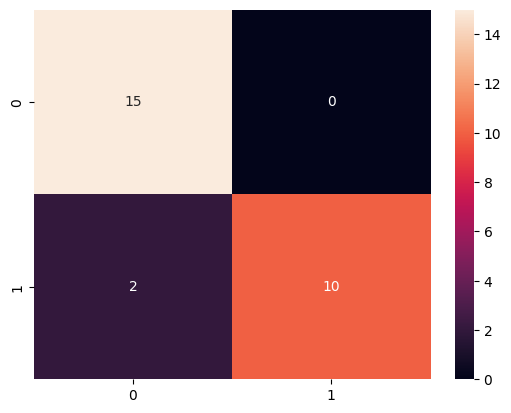

In [ ]:
#Importing Confusion Matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

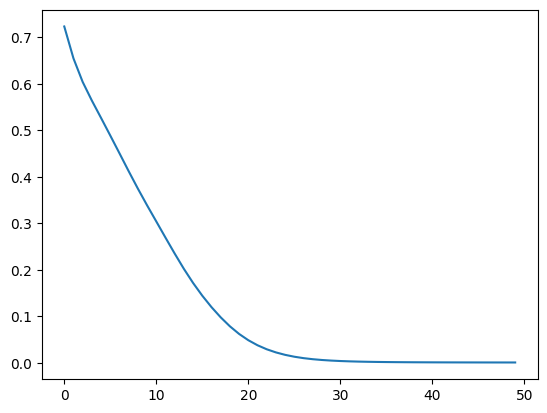

In [ ]:
# Plotting graph for MLPClassifier

loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [ ]:
# # save the model to disk

# filename = 'drive/MyDrive/E-Coli_model.pickle'
# pickle.dump(model, open(filename, 'wb'))

In [ ]:
genome = "ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcg"
genome_false = "ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaac"
genome_list = list(genome_false)
print(genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'a', 'c', 'a', 't', 't', 'a', 'a', 't', 'a', 'a', 'a', 't', 'a', 'a', 'g', 'g', 'a', 'g', 'g', 'c', 't', 'c', 't', 'a', 'a', 't', 'g', 'g', 'c', 'a', 'c', 't', 'c', 'a', 't', 't', 'a', 'g', 'c', 'c', 'a', 'a', 't', 'c', 'a', 'a', 't', 'c', 'a', 'a', 'g', 'a', 'a', 'c']


In [ ]:
encoder = pickle.load(open("drive/MyDrive/EColi-encoder.pickle", 'rb'))
data_test = encoder.transform(df_test).toarray()
print(model.predict(data_test))

[0]


In [ ]:
type(model.predict(data_test)[0])

numpy.int64